In [6]:
from transformers import AutoTokenizer

# 加载预训练的Tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased", pretrained_model_name_or_path="vocab.txt")

# 待处理的文本
text = "Transformers are the core of modern NLP tasks."

# 使用Tokenizer进行编码
encoded_input = tokenizer(text, return_tensors='pt')

# 访问编码结果
input_ids = encoded_input['input_ids']
attention_mask = encoded_input['attention_mask']
print(input_ids)
print(attention_mask)

TypeError: AutoTokenizer.from_pretrained() got multiple values for argument 'pretrained_model_name_or_path'

In [5]:
print(encoded_input)

{'input_ids': tensor([[  101, 19081,  2024,  1996,  4563,  1997,  2715, 17953,  2361,  8518,
          1012,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}


In [4]:
print(len(tokenizer.vocab))

30522


In [28]:
from transformers import BertTokenizerFast

class CustomBertTokenizer(BertTokenizerFast):
    def __init__(self, vocab_file, **kwargs):
        super().__init__(vocab_file=vocab_file, **kwargs)
        # 自定义逻辑...

# 假设已有自定义词汇表
custom_tokenizer = CustomBertTokenizer(vocab_file="vocab_full.txt")
encoded_custom = custom_tokenizer("O=C1(N)Cl", return_tensors="pt")
print(encoded_custom)
encode_num = encoded_custom['input_ids']
print(custom_tokenizer.decode([258,  25,  13,   4,   8,  15,  14,   4, 256]))
# print(custom_tokenizer.get_vocab)

{'input_ids': tensor([[258,  25,  13,   4,   8,  15,  14,   4, 256]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1]])}
[CLS] o = [UNK] ( n ) [UNK] [SEP]


Epoch [100/1000], Loss: 1.8484
Epoch [200/1000], Loss: 1.2885
Epoch [300/1000], Loss: 1.0948
Epoch [400/1000], Loss: 1.0279
Epoch [500/1000], Loss: 1.0047
Epoch [600/1000], Loss: 0.9967
Epoch [700/1000], Loss: 0.9939
Epoch [800/1000], Loss: 0.9929
Epoch [900/1000], Loss: 0.9926
Epoch [1000/1000], Loss: 0.9925


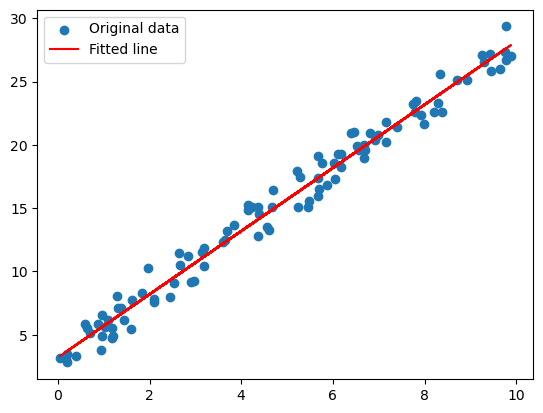

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# 生成一些合成数据
np.random.seed(0)
X = np.random.rand(100, 1) * 10  # 100个样本，每个样本一个特征
y = 2.5 * X + 3 + np.random.randn(100, 1)  # 线性关系并加上噪声

# 将数据转换为PyTorch的Tensor
X_train = torch.tensor(X, dtype=torch.float32).to("cuda")
y_train = torch.tensor(y, dtype=torch.float32).to("cuda")

# 定义一个简单的线性回归模型
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # 输入1个特征，输出1个值

    def forward(self, x):
        return self.linear(x)

# 实例化模型
model = LinearRegressionModel().to("cuda")

# 定义损失函数和优化器
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 训练模型
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# 评估模型
model.eval()
with torch.no_grad():
    predicted = model(X_train).detach().cpu().numpy()

# 可视化结果
plt.scatter(X, y, label='Original data')
plt.plot(X, predicted, label='Fitted line', color='r')
plt.legend()
plt.show()


In [5]:
target = torch.randn(2, 3, 5)
print(target)
print(target[:, 1, :].squeeze(1))

tensor([[[ 1.4424,  0.2252, -1.0175, -1.0651, -0.4816],
         [ 0.5134,  0.7284,  1.0589,  0.3662,  0.9365],
         [-0.6247,  0.3993,  0.0912,  1.4152,  0.5796]],

        [[ 0.7412, -0.5675,  0.3955,  0.1307,  0.6110],
         [ 0.3621, -0.5063, -0.6204, -0.1277, -0.5402],
         [-0.5658,  0.6043,  0.0383, -2.2614,  0.4092]]])
tensor([[ 0.5134,  0.7284,  1.0589,  0.3662,  0.9365],
        [ 0.3621, -0.5063, -0.6204, -0.1277, -0.5402]])


In [6]:
import torch
import torch.nn as nn

# 假设输入序列的长度为 10，特征维度为 512
seq_len = 10
d_model = 512
nhead = 8  # 自注意力机制的头数
num_layers = 6  # 编码器层的数量

# 创建一个 Transformer 编码器层
encoder_layer = nn.TransformerEncoderLayer(
    d_model=d_model,
    nhead=nhead,
    dim_feedforward=2048,  # 前馈神经网络中的隐藏层维度
    dropout=0.1,
    activation='relu'
)

# 创建一个包含多个编码器层的 Transformer 编码器
encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers).to("cuda")

# 创建一个输入张量，形状为 (batch_size, seq_len, d_model)
batch_size = 32
input_tensor = torch.randn(batch_size, seq_len, d_model).to("cuda")

# 将输入张量传递给编码器
output_tensor = encoder(input_tensor)

print("Input shape:", input_tensor.shape)
print("Output shape:", output_tensor.shape)


Input shape: torch.Size([32, 10, 512])
Output shape: torch.Size([32, 10, 512])


/home/xc/miniconda3/envs/usual_torch/lib/python3.10/site-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [2]:
import numpy as np

np1 = np.array([[1,2], [5,6]])
np2 = np.array([[3,4], [7,8]])
train_x = np.concatenate([np1, np2],axis=1)
print(train_x)

[[1 2 3 4]
 [5 6 7 8]]
